## Summary

**proteusPy** is a Python package specializing in the modeling and
analysis of proteins of known structure with an emphasis on Disulfide
Bonds. This package reprises my molecular modeling program *proteus*,
(Pabo and Suchanek 1986), and utilizes a new implementation of the
[Turtle3D](https://suchanek.github.io/proteusPy/proteusPy/turtle3D.html)
class for disulfide and protein modeling. The
[Disulfide](https://suchanek.github.io/proteusPy/proteusPy/Disulfide.html)
class implements methods to analyze the protein structure stabilizing
element known as a **Disulfide Bond**.

The work has resulted in a freely-accessible database of over 120,494
disulfide bonds contained within 35,818 proteins in the RCSB protein
databank.

## Motivation

My primary motivation for implementing `proteusPy` was to revisit the
[RCSB Protein Databank](https://www.rcsb.org) and do a structural
analysis of the disulfide bonds contained therein. This necessitated the
creation an object-oriented database capable of introspection, analysis
and display. The API (Suchanek 2023a) is available online at:
<https://suchanek.github.io/proteusPy/proteusPy.html> and provides more
details and numerous examples.

## Requirements

1.  PC running MacOS, Linux, Windows
2.  16 GB RAM
3.  2 GB disk space

## Installation

It’s simplest to clone the repo via github since it contains all of the
notebooks, test programs and raw Disulfide databases.

-   Install Anaconda: <http://anaconda.org>

-   Install git-lfs

    -   <https://help.github.com/en/github/managing-large-files/installing-git-large-file-storage>

-   From a shell prompt:

    \`\`\`console \$ git-lfs track “*.csv” ”*.pkl” “\*.mp4” \$ git clone
    https://github.com/suchanek/proteusPy/proteusPy.git \$ cd proteusPy
    \$ conda env create –name proteusPy –file=proteusPy.yml \$ conda
    activate proteusPy \$ pip install . \$ jupyter nbextension enable
    –py –sys-prefix widgetsnbextension \$ python -m ipykernel install
    –user –name proteusPy –display-name “Python (proteusPy)”

## General Usage

Once the package is installed one can use the existing notebooks for
analysis of the RCSB Disulfide database. The [notebooks]() directory
contains all of my Jupyter notebooks and is a good place to start. The
[DisulfideAnalysis.ipynb](https://github.com/suchanek/proteusPy/blob/master/notebooks/DisulfideAnalysis.ipynb)
notebook contains the first analysis paper. The
[programs](https://github.com/suchanek/proteusPy/tree/master/programs)
subdirectory contains the primary programs for downloading the RCSB
disulfide-containing structure files,
[DisulfideDownloader.py](https://github.com/suchanek/proteusPy/blob/master/programs/DisulfideDownloader.py),
extracting the disulfides and creating the database loaders
[DisulfideExtractor.py](https://github.com/suchanek/proteusPy/blob/master/programs/DisulfideExtractor.py)
and cluster analysis
[DisulfideClass_Analysis.py](https://github.com/suchanek/proteusPy/blob/master/programs/DisulfideExtractor.py).

The first time one loads the database via
[Load_PDB_SS()](https://suchanek.github.io/proteusPy/proteusPy/DisulfideLoader.html#Load_PDB_SS)
the system will attempt to download the full and subset database from my
Google Drive. If this fails the system will attempt to rebuild the
database from the repo’s `data` subdirectory (not the package’s). If
you’ve downloaded from github this will work correctly. If you’ve
installed from pyPi via `pip` it will fail.

## Class Details

The primary classes developed for `proteusPy` are described briefly
below. Please see the
[API](https://suchanek.github.io/proteusPy/proteusPy.html) for details.

## [Disulfide](https://suchanek.github.io/proteusPy/proteusPy/Disulfide.html)

This class provides a Python object and methods representing a physical
disulfide bond either extracted from the RCSB protein databank or a
virtual one built using the
[Turtle3D](https://suchanek.github.io/proteusPy/proteusPy/turtle3D.html)
class. The disulfide bond is an important intramolecular stabilizing
structural element and is characterized by:

-   Atomic coordinates for the atoms $N, C_{\alpha}$, $C_{\beta}$, $C'$,
    $S_\gamma$ for both residues. These are stored as both raw atomic
    coordinates as read from the RCSB file and internal local
    coordinates.
-   The dihedral angles $\chi_{1} - \chi_{5}$ for the disulfide bond
-   A name, by default:
    `{pdb_id}{prox_resnumb}{prox_chain}_{distal_resnum}{distal_chain}`
-   Proximal residue number
-   Distal residue number
-   Approximate bond torsional energy (kcal/mol): $$
      E_{kcal/mol} \approx 2.0 * cos(3.0 * \chi_{1}) + cos(3.0 * \chi_{5}) + cos(3.0 * \chi_{2}) +
    $$ $$
      cos(3.0 * \chi_{4}) + 3.5 * cos(2.0 * \chi_{3}) + 0.6 * cos(3.0 * \chi_{3}) + 10.1
    $$
-   Euclidean length of the dihedral angles (degrees) defined as:
    $$\sqrt(\chi_{1}^{2} + \chi_{2}^{2} + \chi_{3}^{2} + \chi_{4}^{2} + \chi_{5}^{2})$$
-   $C_{\alpha} - C_{\alpha}$ distance ($\text{\normalfont\AA}$)
-   $C_{\beta} - C_{\beta}$ distance ($\text{\normalfont\AA}$)
-   The previous C’ and next N coordinates for both the proximal and
    distal residues. These are needed to calculate the backbone dihedral
    angles $\phi$, $\psi$.
-   Backbone dihedral angles $\phi$ and $\psi$, when possible. Not all
    structures are complete and in those cases the atoms needed may be
    undefined. In this case the $\phi$ and $\psi$ angles are set to
    -180°.

The class also provides 3D rendering capabilities using the excellent
[PyVista](https://pyvista.org) library, and can display disulfides
interactively in a variety of display styles:

-   ‘sb’ - Split Bonds style - bonds colored by their atom type

-   ‘bs’ - Ball and Stick style - split bond coloring with small atoms

-   ‘pd’ - Proximal/Distal style - bonds colored *Red* for proximal
    residue and *Green* for the distal residue.

-   ‘cpk’ - CPK style rendering, colored by atom type:

    -   Carbon - Grey
    -   Nitrogen - Blue
    -   Sulfur - Yellow
    -   Oxygen - Red
    -   Hydrogen - White

Individual renderings can be saved to a file and animations can be
created. The *cpk* and *bs* styles are illustrated below:
<center>
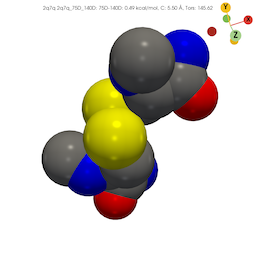 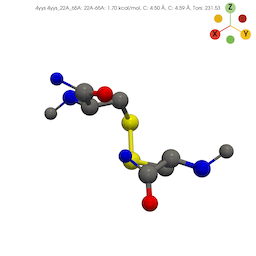
</center>

## [DisulfideLoader](https://suchanek.github.io/proteusPy/proteusPy/DisulfideLoader.html)

This class represents the disulfide database itself and is its primary
means of accession. Instantiation takes 2 parameters: `subset` and
`verbose`. Given the size of the database, one can use the `subset`
parameter to load the first 1000 disulfides into memory. This
facilitates quicker development and testing new functions. I recommend
using at least a 16 GB machine to work with the full dataset.

The entirety of the RCSB disulfide database is stored within the class
via a
[DisulfideList](%22https://suchanek.github.io/proteusPy/proteusPy/DisulfideList.html%22),
a `Pandas` .csv file, and a `dict` of indices mapping the RCSB IDs into
their respective list of disulfides. The datastructures allow simple,
direct and flexible access to the disulfide structures contained within.
This makes it possible to access the disulfides by array index, RCSB
structure ID or disulfide name.

Example:

``` python
  import proteusPy
  from proteusPy.Disulfide import Disulfide
  from proteusPy.DisulfideLoader import DisulfideLoader
  from proteusPy.DisulfideList import DisulfideList

  SS1 = DisulfideList([],'tmp1')
  SS2 = DisulfideList([],'tmp2')

  PDB_SS = DisulfideLoader(verbose=False, subset=True)

  # Accessing by index value:
  SS1 = PDB_SS[0]
  SS1
  <Disulfide 4yys_22A_65A, Source: 4yys, Resolution: 1.35 Å>

  # Accessing by PDB_ID returns a list of Disulfides:
  SS2 = PDB_SS['4yys']
  SS2
  [<Disulfide 4yys_22A_65A, Source: 4yys, Resolution: 1.35 Å>, 
  <Disulfide 4yys_56A_98A, Source: 4yys, Resolution: 1.35 Å>, 
  <Disulfide 4yys_156A_207A, Source: 4yys, Resolution: 1.35 Å>]

  # Accessing individual disulfides by their name:
  SS3 = PDB_SS['4yys_56A_98A']
  SS3
  <Disulfide 4yys_56A_98A, Source: 4yys, Resolution: 1.35 Å>

  # Finally, we can access disulfides by regular slicing:
  SSlist = SS2[:2]
  [<Disulfide 4yys_56A_98A, Source: 4yys, Resolution: 1.35 Å>, 
  <Disulfide 4yys_156A_207A, Source: 4yys, Resolution: 1.35 Å>]
```

The class can also render Disulfides overlaid on a common coordinate
system to a pyVista window using the
[DisulfideLoader.display_overlay()](https://suchanek.github.io/proteusPy/proteusPy/DisulfideLoader.html#DisulfideLoader.display_overlay)
method.

**NB:** For typical usage one accesses the database via the
`Load_PDB_SS()` function. This function loads the compressed database
from its single source. Initializing a `DisulfideLoader()` object will
load the individual torsions and disulfide .pkl files, builds the
classlist structures, and writes the completely built object to a single
`.pkl` file. This requires the raw .pkl files created by download
process. These files are contained in the repository `data` directory.

## [turtle3D](https://suchanek.github.io/proteusPy/proteusPy/turtle3D.html)

The `turtle3D` is an object that maintains a *local coordinate system*
in three dimensional space. This coordinate system consists of:

-   A Position Vector
-   A Heading Vector
-   A Left Vector
-   An Up Vector

These vectors fully define the object’s position and orientation in a
*local* coordinate frame. The Turtle developed in `proteusPy` is based
on the excellent book by Abelson: (Abelson and DiSessa 1986). The
[to_local](%22https://suchanek.github.io/proteusPy/proteusPy/turtle3D.html#Turtle3D.to_local%22)
and
[to_global](%22https://suchanek.github.io/proteusPy/proteusPy/turtle3D.html#Turtle3D.to_global%22)
methods convert between these two. These methods make it possible to
readily compare different disulfides by:

1.  Orienting the turtle at the disulfide’s proximal residue in a
    standard orientation.
2.  Converting the global coordinates of the disulfide as read from the
    RCSB into local coordinates.
3.  Saving all of the local coordinates with the raw coordinates
4.  Performing RMS distance and angle calculations

The turtle has several molecule-specific functions including
[orient_at_residue](%22https://suchanek.github.io/proteusPy/proteusPy/turtle3D.html#Turtle3D.orient_at_residue%22)
and
[orient_from_backbone](%22https://suchanek.github.io/proteusPy/proteusPy/turtle3D.html#Turtle3D.orient_from_backbone%22).

By implementing the functions `Move`, `Roll`, `Yaw`, `Pitch` and `Turn`
the turtle is capable of movement in a three-dimensional space. See
(Pabo and Suchanek 1986) for more details.

## Database Creation

The following steps were performed to create the RCSB database:

1.  Identify disulfide containing proteins in the
    [RCSB](https://www.rcsb.org). I generated a query using the
    web-based query tool for all proteins containing one or more
    disulfide bond. The resulting file consisted of 35,819 IDs.

2.  Download the structure files to disk. This resulted in the program
    [DisulfideDownloader.py](https://github.com/suchanek/proteusPy/blob/master/programs/DisulfideDownloader.py).
    The download took approximately twelve hours.

3.  Extract the disulfides from the downloaded structures. The program
    [DisulfideExtractor.py](https://github.com/suchanek/proteusPy/blob/master/programs/DisulfideExtractor.py)
    was used to extract disulfides from the individual structure files.
    This seemingly simple task was complicated by several factors
    including:

    1.  Duplicate disulfides contained within a multi-chain protein
        file.
    2.  Physically impossible disulfides, where the
        $C_\alpha - C_\alpha$ distance is \> 8 $\text{\normalfont\AA}$ .
    3.  Structures with disordered CYS atoms.

In the end I elected to only use a single example of a given disulfide
from a multi-chain entry, and removed any disulfides with a
$C_\alpha - C_\alpha$ distance is \> 8 \$\$. This resulted in the
current database consisting of 35,808 structures and 120,494 disulfide
bonds. To my knowledge this is the only searchable database of disulfide
bonds in existence.

## Examples

I illustrate a few use cases for the package below. See the notebooks
for more examples.

### Find the lowest and highest energy disulfides present in the database.

``` python
# default parameters will read from the package itself.

PDB_SS = Load_PDB_SS(verbose=False, subset=False)

# display the best and worst SS

ssMin, ssMax = PDB_SS.SSList.minmax_energy()
minmaxlist = DisulfideList([ssMin, ssMax], 'mm')
minmaxlist.display(style='bs', light=True)
```

<center>

<figure>
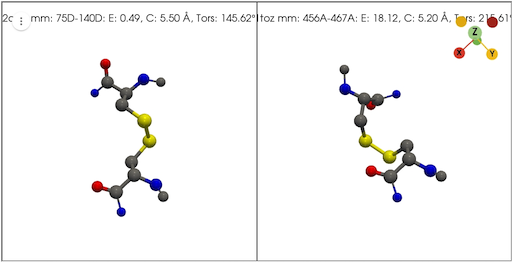
<figcaption aria-hidden="true">minmax</figcaption>
</figure>

</center>

### Find disulfides within 10 $\text{\normalfont\AA}$ RMS in torsional space of the lowest energy structure.

In this example we load the disulfide database, find the disulfides with
the lowest and highest energies, and then find the nearest
conformational neighbors. Finally, we display the neighbors overlaid
against a common reference frame.

``` python
import proteusPy
from proteusPy.DisulfideLoader import DisulfideLoader
from proteusPy.DisulfideList import DisulfideList
from proteusPy.Disulfide import Disulfide

PDB_SS = None
PDB_SS = Load_PDB_SS(verbose=False, subset=True)
ss_list = DisulfideList([], 'tmp')

# We point to the complete list to search for lowest and highest energies.

sslist = PDB_SS.SSList
ssmin_enrg, ssmax_enrg = PDB_SS.SSList.minmax_energy()

# Make an empty list and find the nearest neighbors within 10 degrees avg RMS in
# sidechain dihedral angle space.

low_energy_neighbors = DisulfideList([],'Neighbors')
low_energy_neighbors = ssmin_enrg.Torsion_neighbors(sslist, 10)

# Display the number found, and then display them overlaid onto their common reference frame.

tot = low_energy_neighbors.length
low_energy_neighbors.display_overlay()
```

18

<center>

<figure>
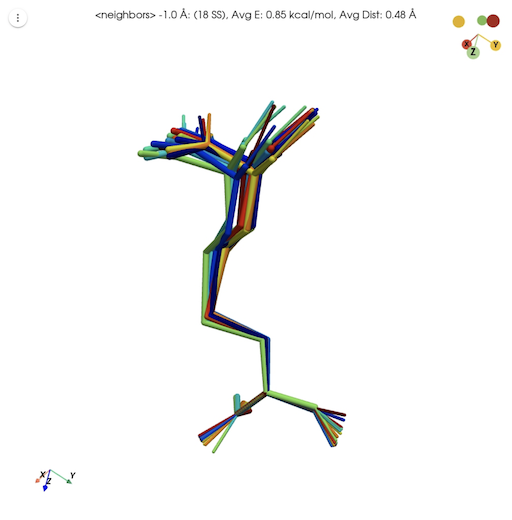
<figcaption aria-hidden="true">min_overlay</figcaption>
</figure>

</center>

### Plotting Disulfide Class Distributions

The package includes the
[DisulfideClassConstructer](https://suchanek.github.io/proteusPy/proteusPy/DisulfideClass_Constructor.html)
class, which is used to create and manage Disulfide binary and sextant
classes.

### The Future

-   I continue to explore disulfide structural classes using the sextant
    class approach. This offers much higher class resolution than the
    binary approach described by (Schmidt 2006) and reveals subgroups
    within the broad class. I’d also like to explore the catalytic and
    allosteric classes in more detail to look for common structural
    elements.

-   I also intend to deploy a Disulfide Database browser for exploration
    and analysis. This is ongoing.

### Misc

*Developer’s Notes:* The .pkl files needed to instantiate this class and
save it into its final .pkl file are defined in the
[proteusPy.data](%22https://suchanek.github.io/proteusPy/proteusPy/data.html%22)
class and should not be changed. Upon initialization the class will load
them and initialize itself.

*NB:* (Suchanek 2023b) relies on my
[fork](https://github.com/suchanek/biopython) of the
[Biopython](https://biopython.org) Python package to download and build
the database, (<https://github.com/suchanek/biopython>). As a result,
one can’t download and create the database locally unless the BioPython
patch is applied. The changed python file is in the repo’s data
directory - `parse_pdb_header.py`. Database analysis is unaffected
without the patch. Also, if you’re running on an M-series Mac then it’s
important to install Biopython first, since the generic release won’t
build on the M1.

### Bibliography

Abelson, Harold, and Andrea A. DiSessa. 1986. *Turtle Geometry: The
Computer as a Medium for Exploring Mathematics*. MIT Press.

Pabo, C. O., and E. G. Suchanek. 1986. “Computer-Aided Model-Building
Strategies for Protein Design.” *Biochemistry* 25 (20): 5987–91.
<https://doi.org/10.1021/bi00368a023>.

Schmidt, Brian. 2006. “Multiple Disulfide-Bonded States of Native
Proteins: Estimate of Number Using Probabilities of Disulfide Bond
Formation.” *Biochemistry* 45 (24): 7429–74334.
<https://doi.org/10.1021/bi0603064>.

Suchanek, Eric G. 2023a. “proteusPy API.” *GitHub Documents*. GitHub.
<https://suchanek.github.io/suchanek/proteusPy/proteusPy.html>.

———. 2023b. “proteusPy: A Package for Modeling and Analyzing Proteins of
Known Structure.” *GitHub Repository*. GitHub.
<https://github.com/suchanek/proteusPy>.